In [1]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential
from keras.utils import np_utils
import seaborn as sns
from keras import optimizers

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np #linear algebra
import os #operatin system commands
import shutil #high-level operating for files (for copying contents)
import random #random generator
from tensorflow import keras #keras neural network library
from tensorflow.keras import layers, models, optimizers #keras tools needed
from keras.layers import BatchNormalization, Dropout, Flatten, Activation,Conv2D, MaxPooling2D #CNN layers used 
from tensorflow.keras.preprocessing.image import ImageDataGenerator #image preprocessor for CNN
from tensorflow.keras.metrics import FalseNegatives,FalsePositives, SpecificityAtSensitivity #metrics used in cnn_model performance evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve #metrics used in final network performance evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import os 
from keras.layers import SeparableConv2D
from keras import optimizers,regularizers
from tensorflow.python.keras import regularizers
from tensorflow.keras.optimizers import SGD
from keras.models import *
from keras.engine.data_adapter import train_validation_split
import pandas as pd

In [18]:
train_data = '/content/drive/MyDrive/DATASET_PNEUMONIA/train'
test_data =  '/content/drive/MyDrive/DATASET_PNEUMONIA/test'
val_data  =  '/content/drive/MyDrive/DATASET_PNEUMONIA/val'

In [19]:
#CHỈNH LẠI TỈ LỆ VÀ PRE-PREPROCESSING DATA
train_datagen = ImageDataGenerator(rescale=1/255,rotation_range=0.2,horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1/255)

train_set = train_datagen.flow_from_directory(train_data,
                                              target_size=(128, 128),
                                              batch_size=10,
                                              class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_data,
                                            target_size=(128, 128),
                                            batch_size=10,
                                            class_mode='categorical')
val_set = train_datagen.flow_from_directory(val_data,
                                            target_size=(128, 128),
                                            batch_size=10,
                                            shuffle=True,
                                            class_mode='categorical')

Found 5216 images belonging to 3 classes.
Found 624 images belonging to 3 classes.
Found 25 images belonging to 3 classes.


Text(0.5, 1.0, 'VALIDATION SET')

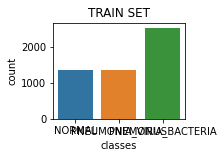

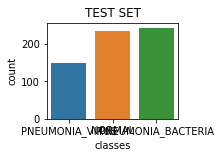

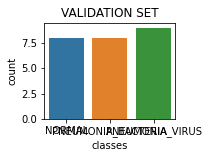

In [20]:
## count number of images in each class for training data
DF = pd.DataFrame(columns=['classes','count'])
DF1 = pd.DataFrame(columns=['classes','count'])
DF2 = pd.DataFrame(columns=['classes','count'])

DF['classes']=pd.Series([os.listdir(train_data)[x] for x in range(0,3)])
DF['count']=pd.Series([len(os.listdir(os.path.join(train_data,os.listdir(train_data)[x]))) for x in range(0,3)])
plt.figure(figsize=(8,6))
plt.subplot(3, 3, 1)
g=sns.barplot(x='classes', y='count',data=DF)
g.set_xticklabels(g.get_xticklabels())
plt.title("TRAIN SET")

## count number of images in each class for test data

DF1['classes']=pd.Series([os.listdir(test_data)[x] for x in range(0,3)])
DF1['count']=pd.Series([len(os.listdir(os.path.join(test_data,os.listdir(test_data)[x]))) for x in range(0,3)])
plt.figure(figsize=(8,6))
plt.subplot(3, 3, 2)
g=sns.barplot(x='classes', y='count',data=DF1)
g.set_xticklabels(g.get_xticklabels())
plt.title("TEST SET")

## count number of images in each class for valid data

DF2['classes']=pd.Series([os.listdir(val_data)[x] for x in range(0,3)])
DF2['count']=pd.Series([len(os.listdir(os.path.join(val_data,os.listdir(val_data)[x]))) for x in range(0,3)])
plt.figure(figsize=(8,6))
plt.subplot(3, 3, 3)
g=sns.barplot(x='classes', y='count',data=DF2)
g.set_xticklabels(g.get_xticklabels())
plt.title("VALIDATION SET")

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_64 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_55 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_65 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_66 (Conv2D)          (None, 64, 64, 32)        18464     
                                                     

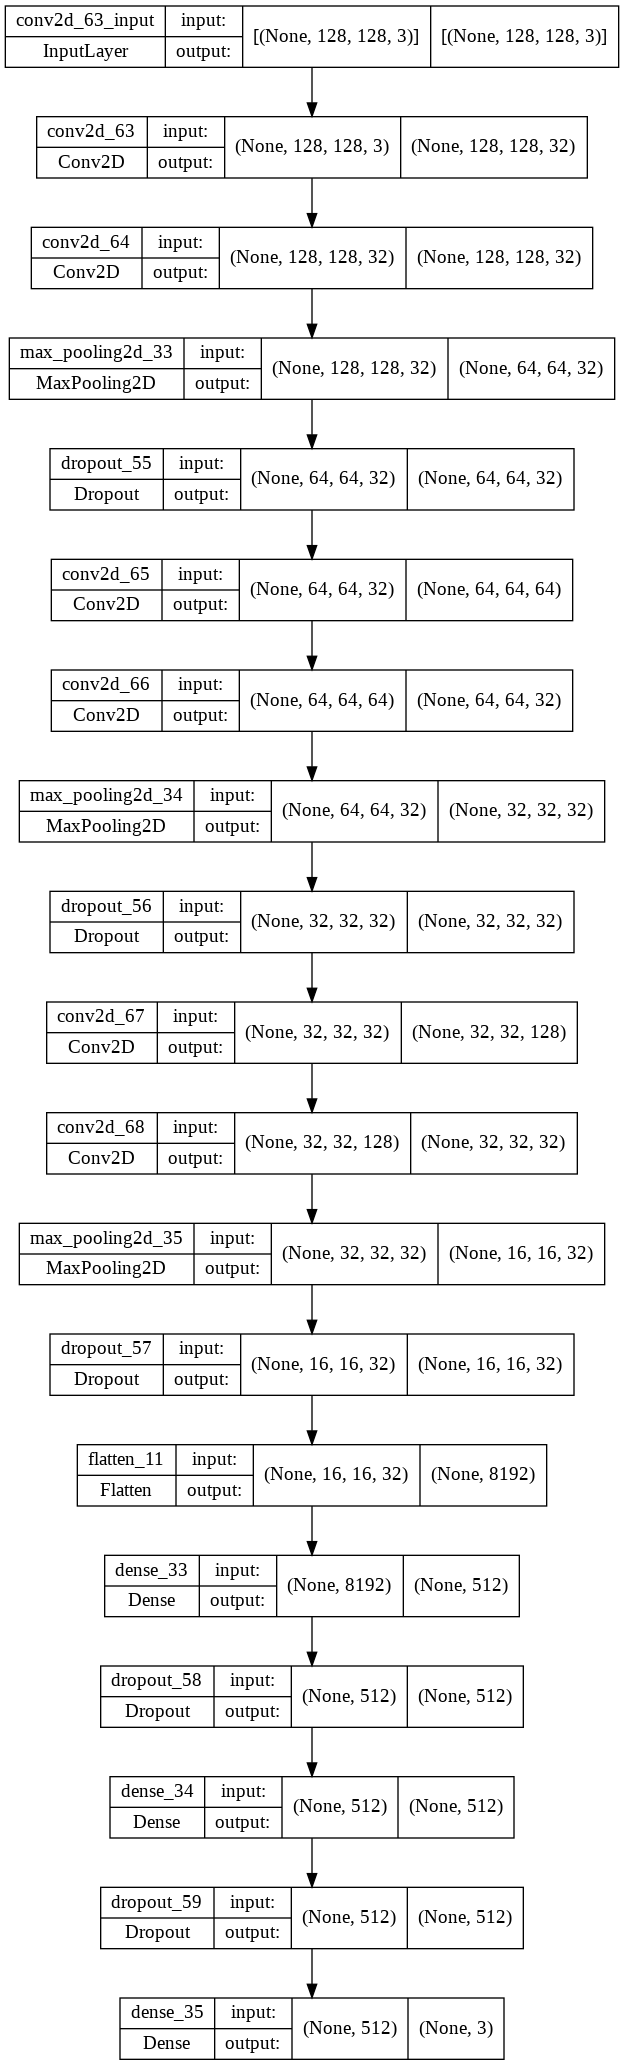

In [ ]:
model=Sequential()

#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(128,128,3)))
model.add(Conv2D(32,(3,3), padding='same',activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3), padding='same',activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3), padding='same',activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 128 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))  
model.summary()
#  Hiển thị hàm cnn_model.summary() dưới dạng biểu đồ 
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes = True)


In [ ]:
#ĐẶT NHÃN
class_name = ['Normal', 'Pneumoia Bacteria','Pneumonia Virus']

#IN NHÃN VÀ ĐẶT GIÁ TRỊ CHO TỪNG PHẦN TỬ
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print(" Health problems: ",train_input.num_classes)

labels:  ['Normal', 'Pneumoia Bacteria', 'Pneumonia Virus']
match class:  {'NORMAL': 0, 'PNEMONIA_BACTERIA': 1, 'PNEUMONIA_VIRUS': 2}
 Health problems:  3


In [ ]:
from tensorflow.keras.optimizers import Adam
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(train_set,steps_per_epoch=3800//10,epochs=100
                            ,validation_data=test_set,validation_steps=2200//10)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


380/380 [==============================] - 58s 152ms/step - loss: 0.6194 - accuracy: 0.7355
Epoch 2/100
380/380 [==============================] - 59s 154ms/step - loss: 0.6064 - accuracy: 0.7405
Epoch 3/100
380/380 [==============================] - 58s 152ms/step - loss: 0.6145 - accuracy: 0.7339
Epoch 4/100
380/380 [==============================] - 57s 150ms/step - loss: 0.5915 - accuracy: 0.7516
Epoch 5/100
380/380 [==============================] - 58s 152ms/step - loss: 0.5876 - accuracy: 0.7537
Epoch 6/100
380/380 [==============================] - 58s 153ms/step - loss: 0.5859 - accuracy: 0.7574
Epoch 7/100
380/380 [==============================] - 57s 150ms/step - loss: 0.5897 - accuracy: 0.7513
Epoch 8/100
380/380 [==============================] - 58s 152ms/step - loss: 0.5789 - accuracy: 0.7513
Epoch 9/100
380/380 [==============================] - 57s 151ms/step - loss: 0.5887 - accuracy: 0.7418
Epoch 10/100
380/380 [==============================] - 59s 155ms/step - los

In [ ]:
model.save('/content/drive/MyDrive/DATASET_PROJECT/Pneumonia.h5')

In [ ]:
score = model.evaluate(test_input, verbose=0)
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

Test loss: 0.8973
Test accuracy 0.7196


array([1])

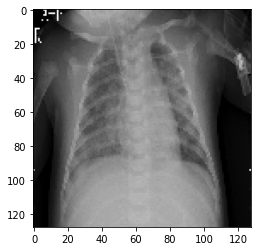

In [ ]:
pic = image.load_img('/content/drive/MyDrive/DATASET_PROJECT/test/PNEUMONIA_BACTERIA/person1946_bacteria_4875.jpeg', target_size=(128,128)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,128,128,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [ ]:
# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("status: Normal")
if guess[0]==1:
  print("status: Pneumonia_Bacteria")
if guess[0]==2:
  print("status: Pneumonia_Virus")


status: Pneumonia_Bacteria


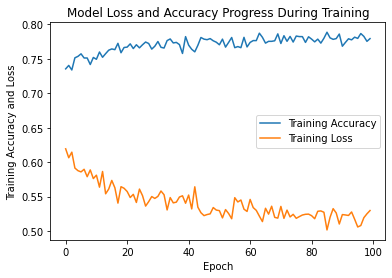

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss'])

<function matplotlib.pyplot.show>

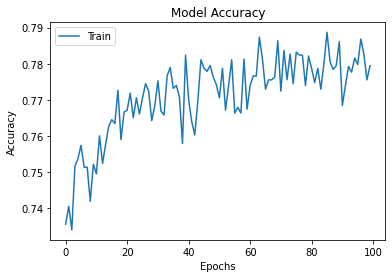

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

<function matplotlib.pyplot.show>

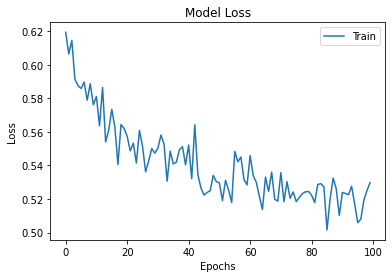

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show